## **Grupo 2** - **EDA_Opendata_AIG_Brazil**



Opendata `AIG Brazil`

A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA no anos de 2008 a 2018 que ocorreram em solo brasileiro

## **Desenvolvedores**

- Arthur Dalcin (Dalcin)
- Arthur Gomes
- Davi Ribeiro
- Thais Fernades
- Luciano Weber



## **Estrutura do Projeto**

O projeto é dividido nas seguintes seções:

1. **Coleta de Dados**: Dados obtidos do Kaggle.

2. **Limpeza de Dados**: Tratamento de dados faltantes, duplicados ou inconsistentes.

3. **Análise Exploratória de Dados (EDA)**:

   - Análise descritiva (frequência de ocorrências, localização, categorias).
   - Identificação de causas e tipos de acidentes.

5. **Visualização**: Geração de gráficos para apresentação dos dados analisados.

6. **Conclusões**: Interpretação dos resultados e insights obtidos.

## **Fontes de Dados**

Os dados utilizados neste projeto foram extraídos das seguintes fontes públicas:
- [Portal de Dados Abertos do CENIPA](https://dados.gov.br/dataset/ocorrencias-aeronauticas)

- [Kaggle](https://www.kaggle.com/datasets/nosbielcs/opendataaigbrazil)


## **Metodologia**

- Cada desenvolvedor formulou entre 4 e 5 perguntas que pudessem ser respondidas com os dados disponíveis no dataset.

- Após a formulação das perguntas, cada desenvolvedor selecionou uma ou duas questões principais para conduzir a análise exploratória de dados (EDA) a ser apresentada.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/accidents.csv")

In [ ]:
df.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,...,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,2013-05-05,11:00:00,ARIQUEMES,RO,BRASIL,SJOG,PUAUN,...,PET,EXPERIMENTAL,****,****,CIRCUITO DE TRÁFEGO,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06
1,201805021421302,INCIDENTE,AERÓDROMO,2018-03-09,22:40:00,CACOAL,RO,BRASIL,SSKW,PRAXL,...,TPR,REGULAR,SSKW,SBCY,TÁXI,VOO REGULAR,NENHUM,NaN,0,2018-05-06
2,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,2013-11-25,12:32:00,CACOAL,RO,BRASIL,SSKW,PTRDP,...,TPX,TÁXI AÉREO,SBJI,SSKW,POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2,2018-05-06
3,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,2016-05-13,19:19:00,CACOAL,RO,BRASIL,SSKW,PTYEL,...,AIF,ADMINISTRAÇÃO INDIRETA,SSKW,SSKW,APROXIMAÇÃO FINAL,OPERAÇÃO ESPECIALIZADA,LEVE,NaN,0,2018-05-06
4,201103187273112,INCIDENTE,OUTROS,2011-03-18,13:30:00,CEREJEIRAS,RO,BRASIL,****,PTUQW,...,SAE,ESPECIALIZADA,****,****,TÁXI,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,NaN,0,2018-05-06


In [ ]:
df.columns

Index(['codigo_ocorrencia', 'ocorrencia_classificacao', 'ocorrencia_tipo',
       'ocorrencia_dia', 'ocorrencia_horario', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'aeronave_matricula',
       ...
       'fator_80', 'fator_81', 'fator_82', 'fator_83', 'fator_84', 'fator_85',
       'fator_86', 'fator_87', 'dia_extracao', 'tipo_acidente'],
      dtype='object', length=117)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Columns: 117 entries, codigo_ocorrencia to tipo_acidente
dtypes: float64(4), int64(3), object(110)
memory usage: 4.6+ MB


In [ ]:
df.shape

(5116, 116)

In [ ]:
df.isna().sum()

,0
codigo_ocorrencia,0
ocorrencia_classificacao,0
ocorrencia_tipo,0
ocorrencia_dia,0
ocorrencia_horario,0
...,...
fator_84,0
fator_85,0
fator_86,0
fator_87,0


In [ ]:
df.describe(include='all')

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,...,fator_80,fator_81,fator_82,fator_83,fator_84,fator_85,fator_86,fator_87,dia_extracao,tipo_acidente
count,5.116000e+03,5116,5116,5116,5116,5116,5116,5116,5116,5116,...,5116,5116,5116,5116,5116,5116,5116,5116,5116,5116
unique,NaN,3,60,2680,915,994,28,1,461,3770,...,2,1,1,1,1,1,1,2,1,2
top,NaN,INCIDENTE,FALHA DO MOTOR EM VOO,2013-12-18,20:00:00,RIO DE JANEIRO,SP,BRASIL,****,PPGMA,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06,Não Fatal
freq,NaN,2817,668,9,105,304,1191,5116,2069,11,...,5113,5116,5116,5116,5116,5116,5116,5107,5116,4731
mean,2.012660e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.816985e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.008010e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.010101e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.013012e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.015041e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Visualizar um resumo rápido de cada coluna
for col in df.columns:
    print(f'{col}:')
    print(df[col].value_counts().head())
    print()

codigo_ocorrencia:
codigo_ocorrencia
200908267180688    4
201202176613731    3
201006245014587    2
201108211854849    2
201409177063403    2
Name: count, dtype: int64

ocorrencia_classificacao:
ocorrencia_classificacao
INCIDENTE          2817
ACIDENTE           1677
INCIDENTE GRAVE     622
Name: count, dtype: int64

ocorrencia_tipo:
ocorrencia_tipo
FALHA DO MOTOR EM VOO                                  668
ESTOURO DE PNEU                                        589
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE     554
PERDA DE CONTROLE NO SOLO                              488
OUTROS                                                 351
Name: count, dtype: int64

ocorrencia_dia:
ocorrencia_dia
2013-12-18    9
2008-03-14    9
2011-07-15    8
2010-04-21    7
2014-02-09    7
Name: count, dtype: int64

ocorrencia_horario:
ocorrencia_horario
20:00:00    105
19:00:00     90
13:30:00     86
20:30:00     83
13:00:00     81
Name: count, dtype: int64

ocorrencia_cidade:
ocorrencia_cidade
RIO D

# **Arthur**
## Tipos de Ocorrências Mais Recorrentes em `Acidentes Fatais` e `Não Fatais`


In [ ]:

# Criar uma coluna categórica para indicar acidentes fatais e não fatais
df['tipo_acidente'] = df['quantidade_fatalidades'].apply(lambda x: 'Fatal' if x > 0 else 'Não Fatal')

# Filtrar dados para acidentes fatais e não fatais
acidentes_fatais = df[df['tipo_acidente'] == 'Fatal']
acidentes_nao_fatais = df[df['tipo_acidente'] == 'Não Fatal']

# Contar os tipos de ocorrências mais recorrentes para ambos os grupos
tipos_fatais = acidentes_fatais['ocorrencia_tipo'].value_counts().head(5)
tipos_nao_fatais = acidentes_nao_fatais['ocorrencia_tipo'].value_counts().head(5)

# Exibindo os resultados
print("Tipos de Ocorrências Mais Recorrentes em Acidentes Fatais:")
print(tipos_fatais)
print("\nTipos de Ocorrências Mais Recorrentes em Acidentes Não Fatais:")
print(tipos_nao_fatais)


Tipos de Ocorrências Mais Recorrentes em Acidentes Fatais:
ocorrencia_tipo
PERDA DE CONTROLE EM VOO                             144
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO     53
INDETERMINADO                                         40
FALHA DO MOTOR EM VOO                                 36
OUTROS                                                26
Name: count, dtype: int64

Tipos de Ocorrências Mais Recorrentes em Acidentes Não Fatais:
ocorrencia_tipo
FALHA DO MOTOR EM VOO                                  632
ESTOURO DE PNEU                                        589
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE     548
PERDA DE CONTROLE NO SOLO                              482
OUTROS                                                 325
Name: count, dtype: int64


## Tipos de Ocorrências Mais Recorrentes em `Acidentes Fatais` e `Não Fatais`

<Figure size 1800x1400 with 0 Axes>

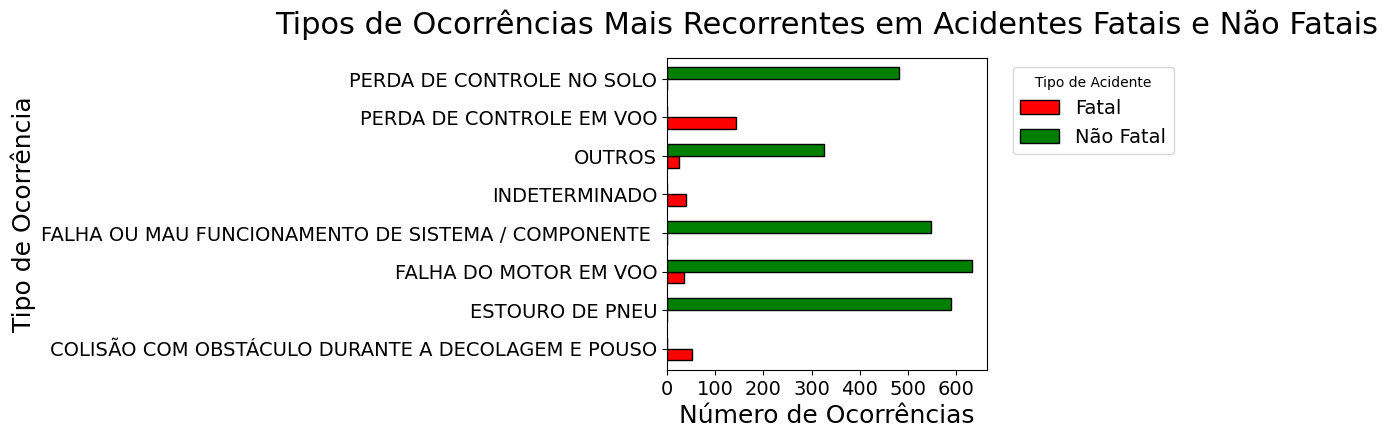

In [ ]:


df['tipo_acidente'] = df['quantidade_fatalidades'].apply(lambda x: 'Fatal' if x > 0 else 'Não Fatal')


tipos_fatais = df[df['tipo_acidente'] == 'Fatal']['ocorrencia_tipo'].value_counts().head(5)
tipos_nao_fatais = df[df['tipo_acidente'] == 'Não Fatal']['ocorrencia_tipo'].value_counts().head(5)


tipos_combinados = pd.DataFrame({
    'Fatal': tipos_fatais,
    'Não Fatal': tipos_nao_fatais
}).fillna(0)


plt.figure(figsize=(18, 14))  # Aumentar o tamanho da figura
ax = tipos_combinados.plot(kind='barh', width=0.6, color=['red', 'green'], edgecolor='black')  # Ajustar a largura das barras

# Ajustar espaçamento entre barras
plt.subplots_adjust(left=0.25, right=0.75, top=0.85, bottom=0.2)


plt.suptitle('Tipos de Ocorrências Mais Recorrentes em Acidentes Fatais e Não Fatais', fontsize=22, x=0.5, y=0.95, ha='center')
plt.xlabel('Número de Ocorrências', fontsize=18)
plt.ylabel('Tipo de Ocorrência', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


labels = [label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(labels)

# Mover a legenda para fora do gráfico
plt.legend(title='Tipo de Acidente', fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# **Thais**


## Qual é a distribuição das classificações das ocorrências (acidente, incidente, incidente grave)?

In [ ]:
# Verificar a distribuição das classificações de ocorrência
classificacao_ocorrência = df['ocorrencia_classificacao'].value_counts()

# Exibir a distribuição
classificacao_ocorrência


,count
ocorrencia_classificacao,
INCIDENTE,2817
ACIDENTE,1677
INCIDENTE GRAVE,622


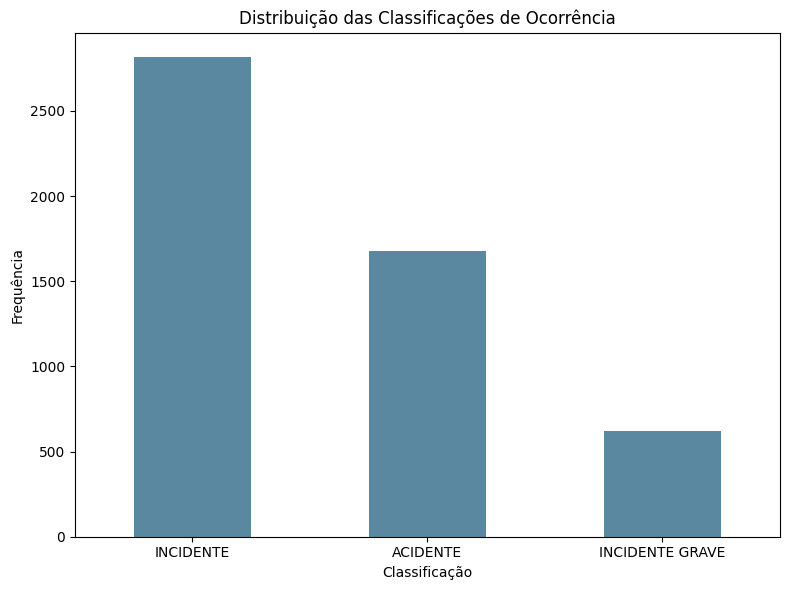

In [ ]:
# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))

classificacao_ocorrência.plot(kind='bar',color='#5B88A1')
# Títulos e rótulos
plt.title('Distribuição das Classificações de Ocorrência')
plt.xlabel('Classificação')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
# Exibir o gráfico
plt.tight_layout()
plt.show()

## Quais são os tipos `mais comuns` de ocorrências relatadas?

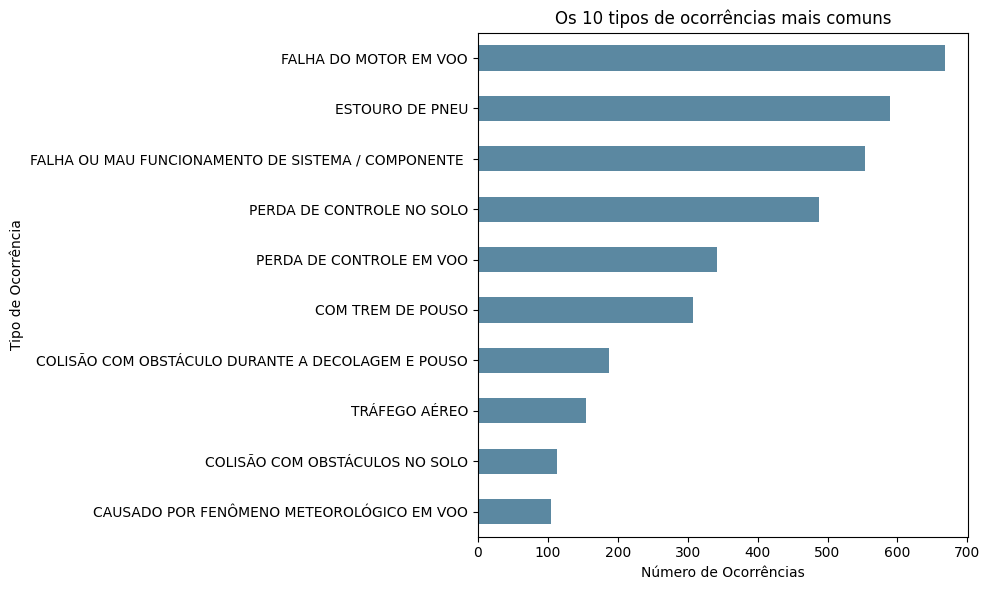

In [ ]:
# Filtrar os dados para excluir a categoria "OUTROS"
dados_filtrados = df[df['ocorrencia_tipo'] != 'OUTROS']

# Contar a frequência dos tipos de ocorrência, excluindo "OUTROS"
ocorrencia_count = dados_filtrados['ocorrencia_tipo'].value_counts().head(10)

# Ordenar os tipos de ocorrência em ordem decrescente
ocorrencia_count = ocorrencia_count.sort_values(ascending=True)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ocorrencia_count.plot(kind='barh',color='#5B88A1')

# Título e rótulos
plt.title('Os 10 tipos de ocorrências mais comuns')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Tipo de Ocorrência')
plt.xticks(rotation=0)

# Exibir o gráfico
plt.tight_layout()
plt.show()


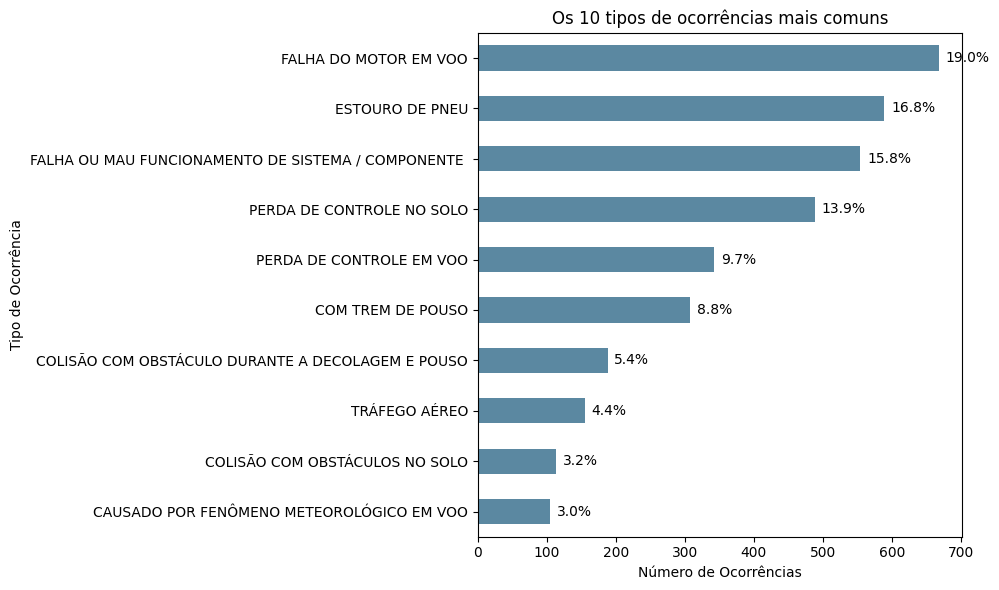

In [ ]:

# Filtrar os dados para excluir a categoria "OUTROS"
dados_filtrados = df[df['ocorrencia_tipo'] != 'OUTROS']

# Contar a frequência dos tipos de ocorrência, excluindo "OUTROS"
ocorrencia_count = dados_filtrados['ocorrencia_tipo'].value_counts().head(10)

# Ordenar os tipos de ocorrência em ordem decrescente
ocorrencia_count = ocorrencia_count.sort_values(ascending=True)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = ocorrencia_count.plot(kind='barh',color='#5B88A1')

# Título e rótulos
plt.title('Os 10 tipos de ocorrências mais comuns')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Tipo de Ocorrência')
plt.xticks(rotation=0)

# Adicionar porcentagem nas barras
total = ocorrencia_count.sum()
for p in ax.patches:
    width = p.get_width()
    percentage = (width / total) * 100
    x = width + 10  # Deslocamento para a direita
    y = p.get_y() + p.get_height() / 2
    ax.text(x, y, f'{percentage:.1f}%', va='center')

# Exibir o gráfico
plt.tight_layout()
plt.show()


# **LUCIANO**


ocorrencia_tipo
CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO              3.600000
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO      1.924528
COLISÃO COM OBSTÁCULOS NO SOLO                         1.000000
COLISÃO DE AERONAVES EM VOO                            1.333333
COM COMANDOS DE VOO                                    2.333333
COM HÉLICE                                             1.500000
COM LANÇAMENTO DE PESSOAS                              1.000000
COM ROTOR                                              4.000000
DESORIENTAÇÃO ESPACIAL                                 2.300000
EXCURSÃO DE PISTA                                      1.000000
FALHA DO MOTOR EM VOO                                  3.750000
FALHA ESTRUTURAL                                       2.400000
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE     1.666667
INCURSÃO EM PISTA                                      1.000000
INDETERMINADO                                          1.850000
OPERAÇÃO A BAIXA ALTITUD

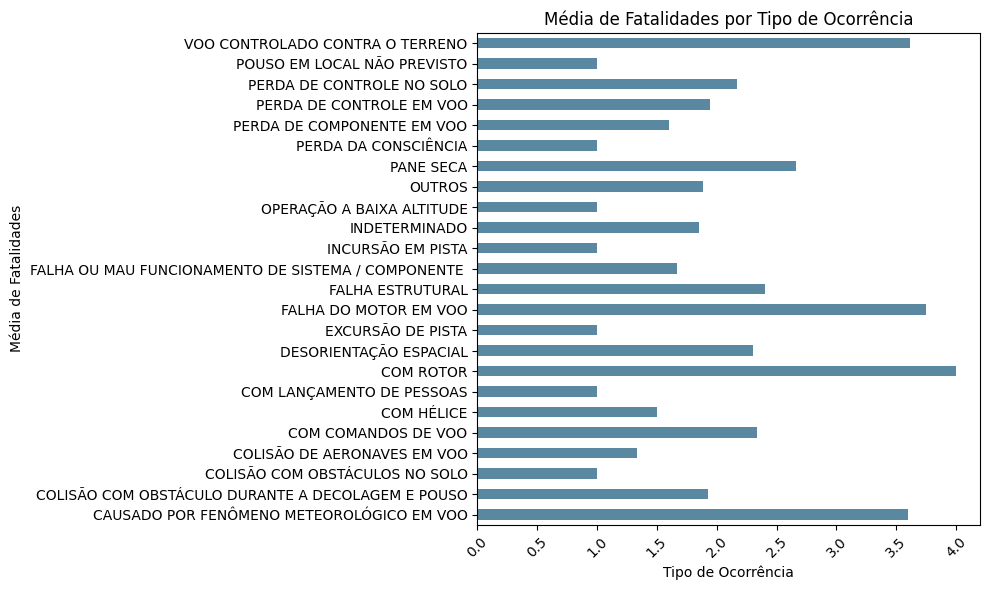

In [ ]:
# Qual é a média de fatalidades por tipo de ocorrência/fatores contribuintes?
# Agrupar por tipo de ocorrência e calcular a média de fatalidades

df['quantidade_fatalidades'] = pd.to_numeric(df['quantidade_fatalidades'], errors='coerce')

media_fatalidades_ocorrencia = df.groupby('ocorrencia_tipo')['quantidade_fatalidades'].mean().dropna()

print(media_fatalidades_ocorrencia)

plt.figure(figsize=(10, 6))
media_fatalidades_ocorrencia.plot(kind='barh', color='#5B88A1')
plt.title('Média de Fatalidades por Tipo de Ocorrência')
plt.xlabel('Tipo de Ocorrência')
plt.ylabel('Média de Fatalidades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **DALCIN**


## O `tipo de operação` (voo regular, táxi aéreo, especializado) está associado a maiores danos nas aeronaves?

In [ ]:
df['aeronave_tipo_operacao'].value_counts()

,count
aeronave_tipo_operacao,
VOO PRIVADO,1575
VOO REGULAR,1063
TÁXI AÉREO,763
VOO DE INSTRUÇÃO,751
OPERAÇÃO AGRÍCOLA,381
VOO EXPERIMENTAL,264
OPERAÇÃO POLICIAL,123
OPERAÇÃO ESPECIALIZADA,87
***,63


In [ ]:
df['aeronave_tipo_operacao'].value_counts(normalize=True)*100

,proportion
aeronave_tipo_operacao,
VOO PRIVADO,30.785770
VOO REGULAR,20.777952
TÁXI AÉREO,14.913995
VOO DE INSTRUÇÃO,14.679437
OPERAÇÃO AGRÍCOLA,7.447224
VOO EXPERIMENTAL,5.160281
OPERAÇÃO POLICIAL,2.404222
OPERAÇÃO ESPECIALIZADA,1.700547
***,1.231431


================================================================================

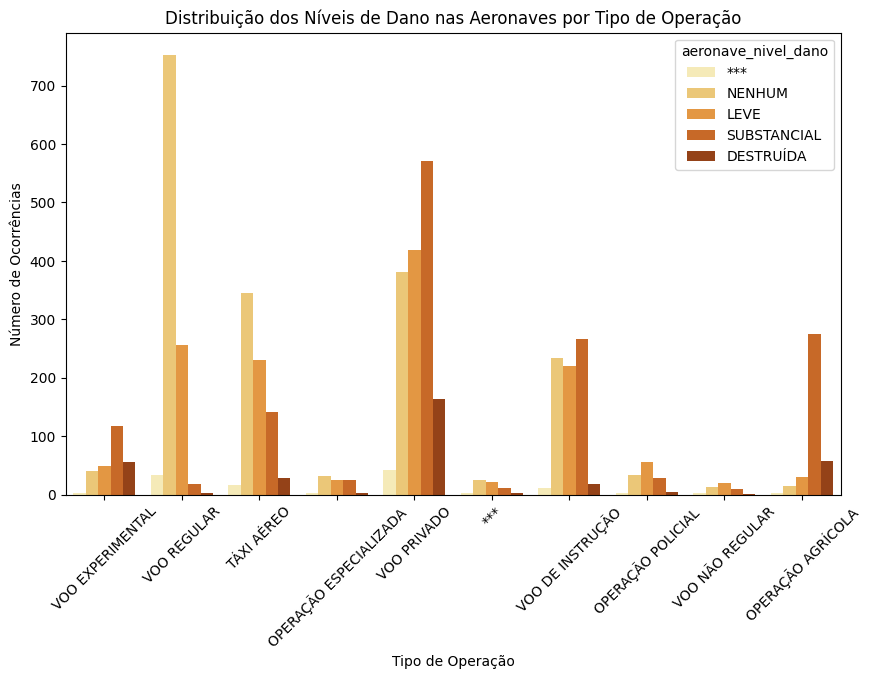

In [ ]:

# Defina a ordem dos níveis de dano, com "DESTRUIDA" no final

ordem_dano = ['***', 'NENHUM', 'LEVE', 'SUBSTANCIAL','DESTRUÍDA']

# Crie a paleta de cores e inverta a ordem, para que a cor mais escura seja usada por "DESTRUIDA"
paleta = sns.color_palette('YlOrBr', len(ordem_dano))

# Fazer o plot
plt.figure(figsize=(10, 6))

sns.countplot(x='aeronave_tipo_operacao',
              hue='aeronave_nivel_dano',
              data=df,
              palette=paleta,
              hue_order=ordem_dano)  # Definindo a ordem dos níveis de dano

plt.xticks(rotation=45)
plt.xlabel('Tipo de Operação')
plt.ylabel('Número de Ocorrências')
plt.title('Distribuição dos Níveis de Dano nas Aeronaves por Tipo de Operação')
plt.show()


In [ ]:
dados_destruidas = df[df['aeronave_nivel_dano'] == 'DESTRUÍDA']
dados_destruidas['aeronave_tipo_operacao'].value_counts(normalize=True)*100

,proportion
aeronave_tipo_operacao,
VOO PRIVADO,48.367953
OPERAÇÃO AGRÍCOLA,17.210682
VOO EXPERIMENTAL,16.320475
TÁXI AÉREO,8.605341
VOO DE INSTRUÇÃO,5.637982
OPERAÇÃO POLICIAL,1.186944
OPERAÇÃO ESPECIALIZADA,0.890208
***,0.890208
VOO REGULAR,0.593472


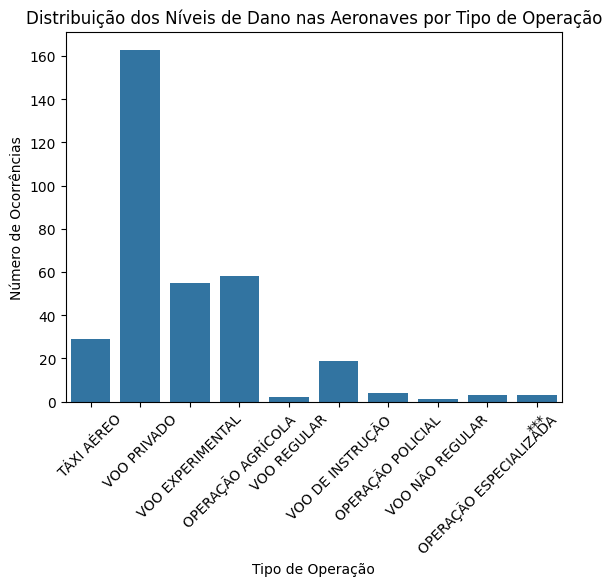

In [ ]:

sns.countplot(x='aeronave_tipo_operacao', data= dados_destruidas)
plt.xticks(rotation=45)
plt.xlabel('Tipo de Operação')
plt.ylabel('Número de Ocorrências')
plt.title('Distribuição dos Níveis de Dano nas Aeronaves por Tipo de Operação')
plt.show()

In [ ]:

df_norm = df.groupby(['aeronave_tipo_operacao','aeronave_nivel_dano'])['aeronave_nivel_dano'].value_counts().reset_index(name='count')

,aeronave_tipo_operacao,aeronave_nivel_dano,count
0,***,***,2
1,***,DESTRUÍDA,3
2,***,LEVE,22
3,***,NENHUM,25
4,***,SUBSTANCIAL,11
5,OPERAÇÃO AGRÍCOLA,***,2
6,OPERAÇÃO AGRÍCOLA,DESTRUÍDA,58
7,OPERAÇÃO AGRÍCOLA,LEVE,31
8,OPERAÇÃO AGRÍCOLA,NENHUM,15
9,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,275


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('aeronave_nivel_dano').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['aeronave_nivel_dano'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='count', y='aeronave_nivel_dano', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
pd.crosstab(df['aeronave_nivel_dano'], df['aeronave_tipo_operacao'])

aeronave_tipo_operacao,***,OPERAÇÃO AGRÍCOLA,OPERAÇÃO ESPECIALIZADA,OPERAÇÃO POLICIAL,TÁXI AÉREO,VOO DE INSTRUÇÃO,VOO EXPERIMENTAL,VOO NÃO REGULAR,VOO PRIVADO,VOO REGULAR
aeronave_nivel_dano,,,,,,,,,,
***,2,2,2,2,16,11,2,2,42,33
DESTRUÍDA,3,58,3,4,29,19,55,1,163,2
LEVE,22,31,25,55,231,220,49,20,418,256
NENHUM,25,15,32,34,345,234,40,13,381,753
SUBSTANCIAL,11,275,25,28,142,267,118,10,571,19


In [ ]:
pd.crosstab(df['aeronave_nivel_dano'], df['aeronave_tipo_operacao'],normalize='columns')

aeronave_tipo_operacao,***,OPERAÇÃO AGRÍCOLA,OPERAÇÃO ESPECIALIZADA,OPERAÇÃO POLICIAL,TÁXI AÉREO,VOO DE INSTRUÇÃO,VOO EXPERIMENTAL,VOO NÃO REGULAR,VOO PRIVADO,VOO REGULAR
aeronave_nivel_dano,,,,,,,,,,
***,0.031746,0.005249,0.022989,0.016260,0.020970,0.014647,0.007576,0.043478,0.026667,0.031044
DESTRUÍDA,0.047619,0.152231,0.034483,0.032520,0.038008,0.025300,0.208333,0.021739,0.103492,0.001881
LEVE,0.349206,0.081365,0.287356,0.447154,0.302752,0.292943,0.185606,0.434783,0.265397,0.240828
NENHUM,0.396825,0.039370,0.367816,0.276423,0.452163,0.311585,0.151515,0.282609,0.241905,0.708373
SUBSTANCIAL,0.174603,0.721785,0.287356,0.227642,0.186107,0.355526,0.446970,0.217391,0.362540,0.017874


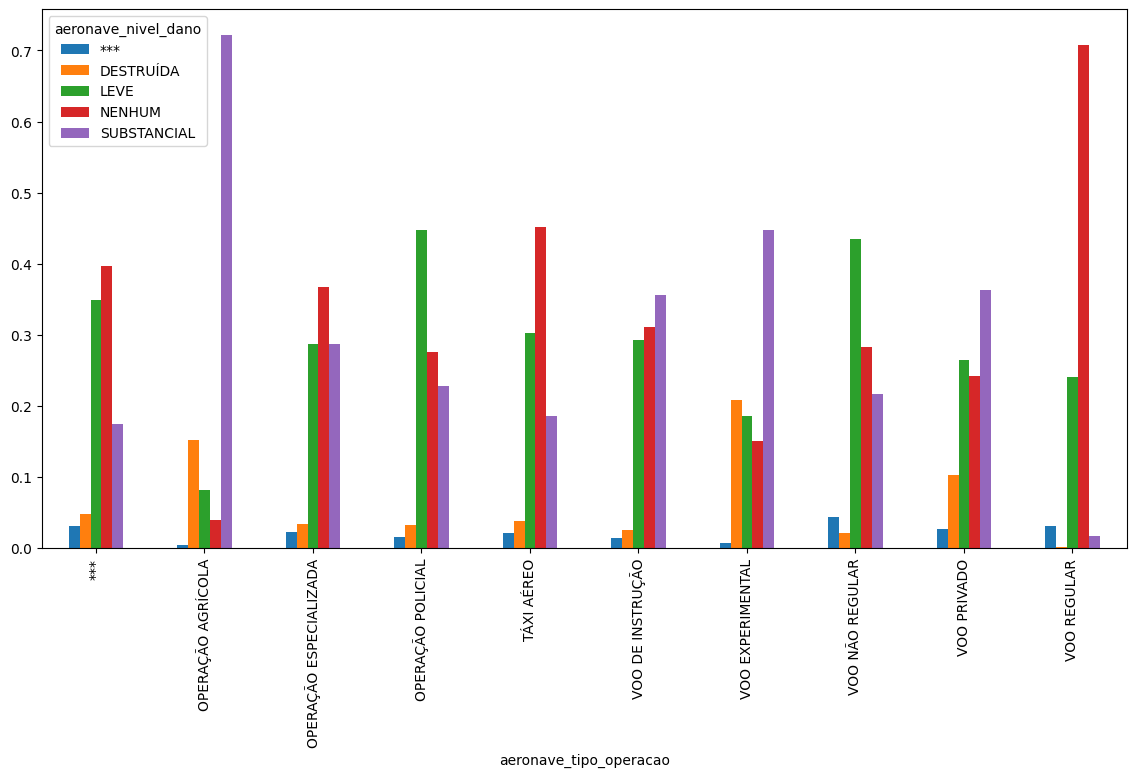

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(14,7))

pd.crosstab(df['aeronave_nivel_dano'], df['aeronave_tipo_operacao'],normalize='columns').transpose().plot(kind='bar', ax=ax)

plt.show()

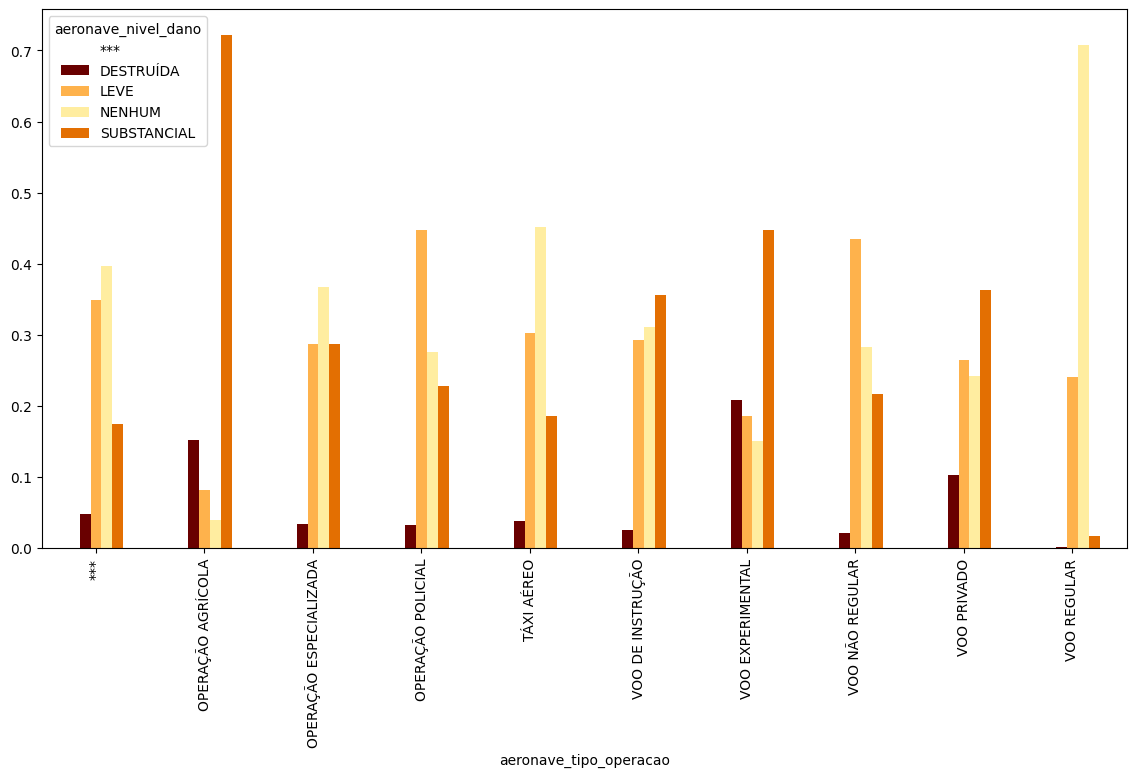

In [ ]:
import matplotlib.pyplot as plt

# Defina a lista de cores que você deseja usar
colors = ['#ffffff', '#690000', '#FEB24C', '#FFEDA0','#e36f02']  # Exemplo de 4 cores diferentes

# Cria o gráfico com as novas cores
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

# Plotando o gráfico de barras com cores personalizadas
pd.crosstab(df['aeronave_nivel_dano'], df['aeronave_tipo_operacao'], normalize='columns').transpose().plot(
    kind='bar',
    stacked=False,
    ax=ax,
    color=colors  # Aplica a lista de cores
)

plt.show()


# **`SIM`** Alguns tipos de operações estão associados a maiores níveis de danos nas aeronaves.


## **DAVI**
### Qual a correlação entre a idade da aeronave e a quantidade de acidentes?


In [ ]:
df = df[df['aeronave_ano_fabricacao'] > 0].copy()
df['idade_aeronave'] = 2024 - df['aeronave_ano_fabricacao']
df_acidente = df[df['ocorrencia_classificacao'] == 'ACIDENTE'].copy()
acidente_groupby = df_acidente.groupby(['idade_aeronave']).size().sort_values(ascending=False)

In [ ]:
acidente_groupby.reset_index(level='idade_aeronave').rename(columns={0: 'n_ocorrencias'}).corr(method='spearman')

,idade_aeronave,n_ocorrencias
idade_aeronave,1.000000,-0.585212
n_ocorrencias,-0.585212,1.000000


### Distribuição de Acidentes por Tipo e Quantidade de Motores

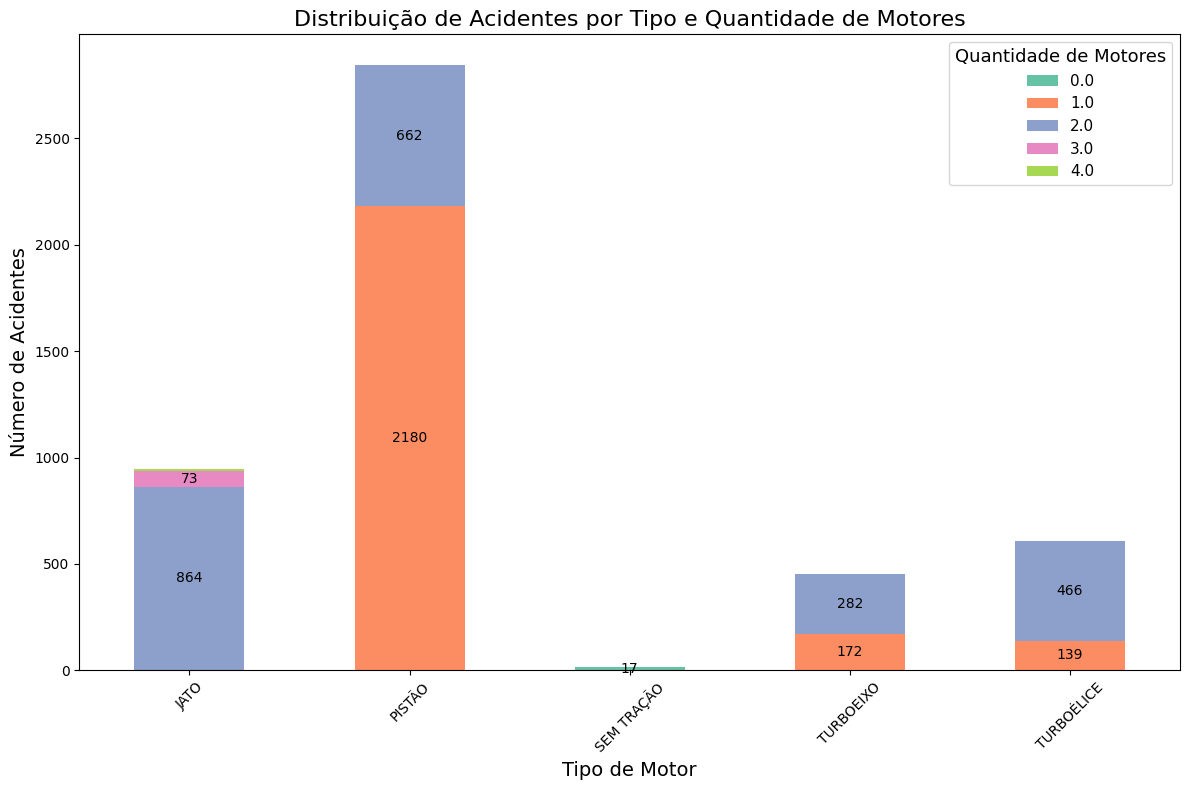

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = df[df['aeronave_tipo_motor'] != '***'].copy()
grouped = df_1.groupby(['aeronave_tipo_motor', 'aeronave_quantidade_motores']).size().unstack().fillna(0)

ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 8))
ax.set_title('Distribuição de Acidentes por Tipo e Quantidade de Motores', fontsize=16)
ax.set_xlabel('Tipo de Motor', fontsize=14)
ax.set_ylabel('Número de Acidentes', fontsize=14)
ax.legend(title='Quantidade de Motores', title_fontsize='13', fontsize='11')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 10:
        ax.text(x + width/2, y + height/2, int(height), ha='center', va='center', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
grouped.div(grouped.sum(axis=1), axis=0)

aeronave_quantidade_motores,0.0,1.0,2.0,3.0,4.0
aeronave_tipo_motor,,,,,
JATO,0.000000,0.000000,0.914286,0.077249,0.008466
PISTÃO,0.000702,0.765718,0.232525,0.000702,0.000351
SEM TRAÇÃO,1.000000,0.000000,0.000000,0.000000,0.000000
TURBOEIXO,0.000000,0.378855,0.621145,0.000000,0.000000
TURBOÉLICE,0.001647,0.228995,0.767710,0.000000,0.001647
